In [16]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:
url = 'https://github.com/Arv1ndrao/Twitter-Impact-prediction/blob/8f9ca9b14b05cf0bcac4a09862f590cd3b11040e/Twitter_clean.csv?raw=true'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Text_Language,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact,Media Type_TEXT,Media Type_VIDEO
0,0,16,0.0,17.0,0.0,0.0,1660.0,133.0,0,737818,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1,37,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,737845,0.0,1.0,10.0,1.0,0.0,110.0,1,0
2,2,16,0.0,78.0,0.0,0.0,39976.0,1560.0,0,737683,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,3,78,0.0,284.0,2.0,0.0,8045.0,27191.0,26,737835,0.0,1.0,460.0,219.0,4.0,6830.0,1,0
4,4,37,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,737610,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [10]:
df.dtypes

Unnamed: 0                int64
Text_Language             int64
Sentiment score         float64
Post Length             float64
Hashtag count           float64
Content URL count       float64
Tweet count             float64
Followers count         float64
Listed Count              int64
Published DateTime        int64
Mentions Count          float64
Post author verified    float64
Likes                   float64
Shares                  float64
Comments                float64
Impact                  float64
Media Type_TEXT           int64
Media Type_VIDEO          int64
dtype: object

In [11]:
df.shape

(50000, 18)

In [12]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [13]:
df.head()

,Text_Language,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact,Media Type_TEXT,Media Type_VIDEO
0,16,0.0,17.0,0.0,0.0,1660.0,133.0,0,737818,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,37,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,737845,0.0,1.0,10.0,1.0,0.0,110.0,1,0
2,16,0.0,78.0,0.0,0.0,39976.0,1560.0,0,737683,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,78,0.0,284.0,2.0,0.0,8045.0,27191.0,26,737835,0.0,1.0,460.0,219.0,4.0,6830.0,1,0
4,37,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,737610,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [14]:
X = df.drop("Impact", axis=1)

Y = df["Impact"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size = 0.30)

In [17]:
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [18]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [19]:
model = Sequential()
model.add(Dense(128, input_dim=16, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, y_train_scaled, validation_split=0.2, epochs =100)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,497
Trainable params: 10,497
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
875/875 [==============================] - 16s 2ms/step - loss: 0.0717 - mae: 0.1135 - val_loss: 0.0042 - val_mae: 0.0374
Epoch 2/100
875/875 [==============================] - 1s 1ms/step - loss: 0.0106 - mae: 0.0409 - val_loss: 0.0075 - val_mae: 0.0223
Epoch 3/100
875/875 [==============================] - 1s 2ms/step - loss: 0.0016 - mae: 0.0204 - val_loss: 5.4446e

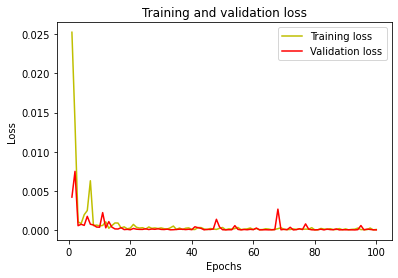

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

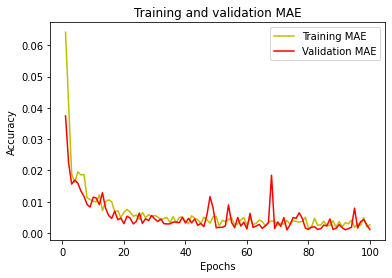

In [21]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
mse_test_neural, mae_test_neural = model.evaluate(X_test_scaled, y_test_scaled)
print('Mean squared error for test data from neural net: ', mse_test_neural)
print('Root Mean squared error for test data from neural net: ', np.sqrt(mse_test_neural))
print('Mean absolute error for test data from neural net: ', mae_test_neural)

469/469 [==============================] - 0s 946us/step - loss: 8.2423e-06 - mae: 0.0011
Mean squared error for test data from neural net:  8.24225389806088e-06
Root Mean squared error for test data from neural net:  0.002870932583336098
Mean absolute error for test data from neural net:  0.0011450444580987096


In [23]:
mse_train_neural, mae_train_neural = model.evaluate(X_train_scaled, y_train_scaled)
print('Mean squared error for train data from neural net: ', mse_train_neural)
print('Root Mean squared error for train data from neural net: ', np.sqrt(mse_train_neural))
print('Mean absolute error from for train data neural net: ', mae_train_neural)

1094/1094 [==============================] - 1s 906us/step - loss: 7.0084e-06 - mae: 0.0011
Mean squared error for train data from neural net:  7.008407010289375e-06
Root Mean squared error for train data from neural net:  0.0026473396099271763
Mean absolute error from for train data neural net:  0.0011044074781239033


In [24]:
y_train_pred_nn = model.predict(X_train_scaled)
y_test_pred_nn = model.predict(X_test_scaled)

In [25]:
from sklearn.metrics import r2_score
print("R sqaure value for train:", r2_score(y_train_scaled,y_train_pred_nn))
print("R sqaure value for test:", r2_score(y_test_scaled,y_test_pred_nn))

R sqaure value for train: 0.9999929915837098
R sqaure value for test: 0.9999923974747551


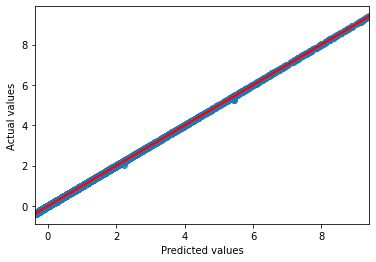

In [26]:
sns.regplot(x = y_train_pred_nn, y=y_train_scaled, lowess = True, line_kws = {"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

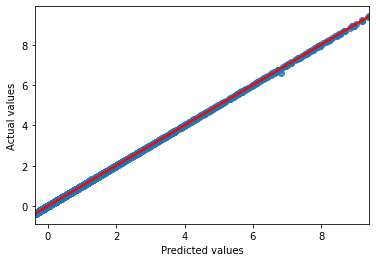

In [27]:
sns.regplot(x = y_test_pred_nn, y=y_test_scaled, lowess = True, line_kws = {"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()